<h1> <center> House Prices Advanced Regression Techniques Kaggle Competition</center></h1>

<h3> Predict sales prices and practice feature engineering, RFs, and gradient boosting</h3>

<h5> Competition Description </h5> 

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

This is my frist competion in Kaggle and found this dataset as a good start. I tried to explian the feature engineering
parts, applied different models inlcuding a deep neural network  and blended these models for a higher accuracey.

This Kernel will be very helpful for the beginner. I have also recommended few other Kernels at the end which I found very
useful. If you like this Kernerl Please give an upvote. 


<h5> Let's get started </h5>

Let's import the libraries

In [1]:
# Primary libraries
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#Stats
from scipy.stats import norm, skew
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#Modelling
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV,LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Others
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# avoid warnings
import warnings
warnings.filterwarnings(action="ignore")

Let's import the data

In [2]:
df_train = pd.read_csv (r'C:\Users\Mizanur Rahman\Desktop\Kaggle Competitions\House Prices Advanced Regression Techniques\house-prices-advanced-regression-techniques\train.csv')
df_test = pd.read_csv (r'C:\Users\Mizanur Rahman\Desktop\Kaggle Competitions\House Prices Advanced Regression Techniques\house-prices-advanced-regression-techniques\test.csv')


<h3> Exploratory Data Analysis (EDA) </h3>

Let's take a quick look at the top 5 rows of the training data using the DataFrame's head() method

In [3]:
df_train .head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Each row reprsents one district. There are 81 attributes

In [4]:
# See the name of the columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The info() method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number
of nonnull values

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are 1460 instances in the dataset

Let's look at the other values. The describe() method shows a summary of the numnerical attributes.

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Another quick way to get a feel of the type of data is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

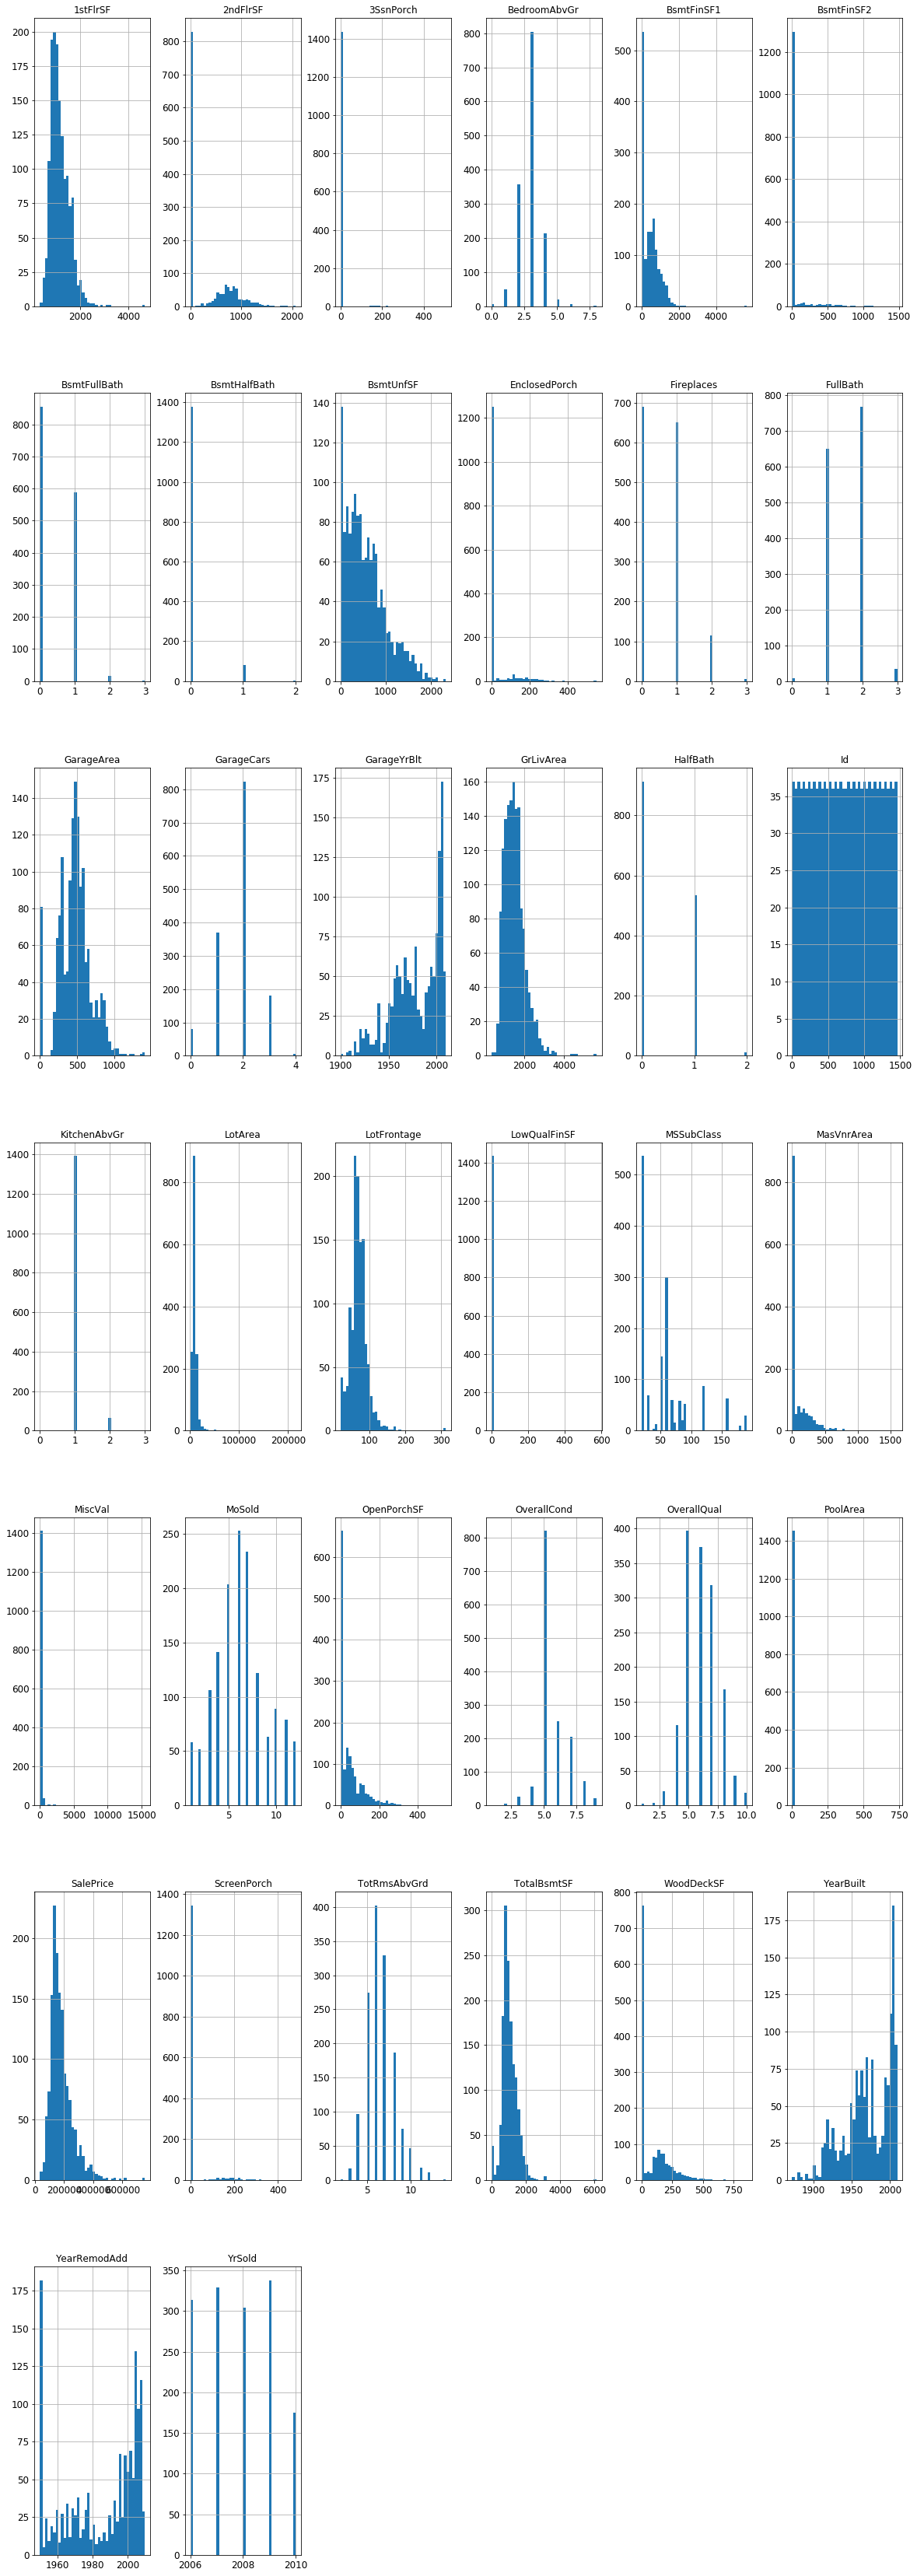

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=40, figsize=(20,60))
#save_fig("attribute_histogram_plots")
plt.show()

<h5> The target variable: SalesPrice </h5>

The goal of our project is to predict the SalePrice which is our target variable, given these features. Let's analyze the salePrice.

The describe() method shows a descriptive statistics summary of the SalePrice.

In [8]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The 25%, 50%, and 75% rows
show the corresponding percentiles: a percentile indicates the value below
which a given percentage of observations in a group of observations fall. These
are often called the 25th percentile (or first quartile), the median, and the
75th percentile (or third quartile).

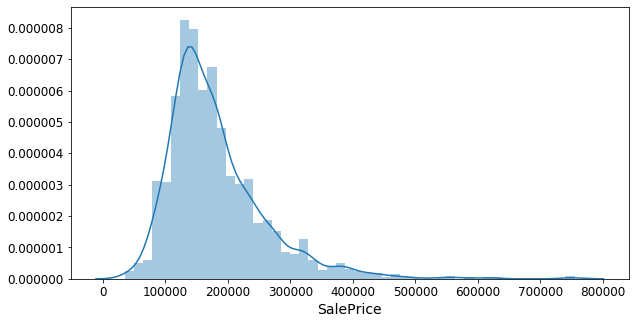

In [9]:
#histogram
plt.figure(figsize=(10,5))
sns.distplot(df_train['SalePrice']);

The SalePrice is deviated from the normal distribution and shows positive skewness. 

In [10]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<h5> Discover and Visualize the Data to Gain
Insights</h5>

Let's analyze the relationship of SalePrice with other numerical variables  

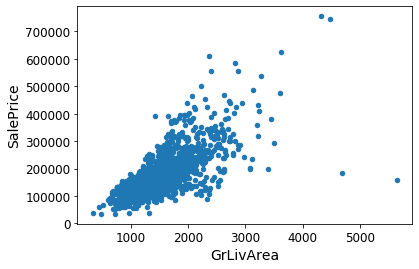

In [11]:
#Scatter plot of SalePrice/GrLivArea
df_train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=1)

This shows a linear relationship and there are two large GrLivArea have low price. These two are outliers. 

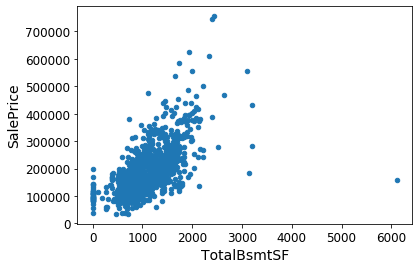

In [14]:
#Scatter plot of SalePrice/ TotalBsmtSF
df_train.plot(kind="scatter", x="TotalBsmtSF", y="SalePrice", alpha=1)

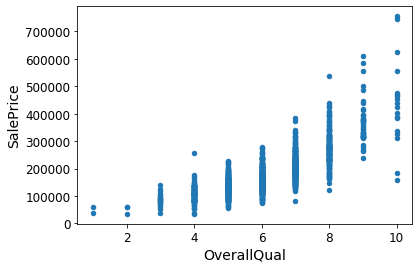

In [15]:
df_train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=1)

Let's remove the outliers

In [16]:
# Remove outliers
df_train.drop(df_train[(df_train['GrLivArea']>4500) & (df_train['SalePrice']<300000)].index, inplace=True)
df_train.drop(df_train[(df_train['TotalBsmtSF']>6000) & (df_train['SalePrice']<300000)].index, inplace=True)
df_train.drop(df_train[(df_train['OverallQual']<4) & (df_train['SalePrice']>200000)].index, inplace=True)
df_train.reset_index(drop=True, inplace=True)

<h5> SalePrice relationship with categorial features </h5>

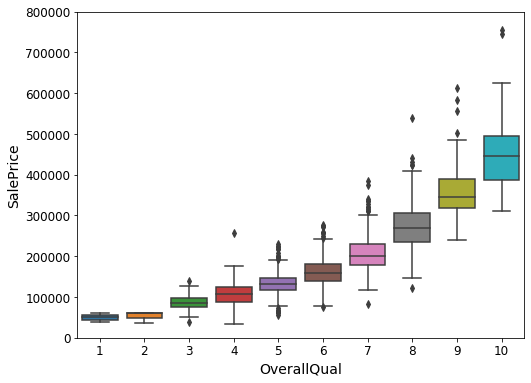

In [17]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df_train["OverallQual"], y=df_train["SalePrice"])
fig.axis(ymin=0, ymax=800000);

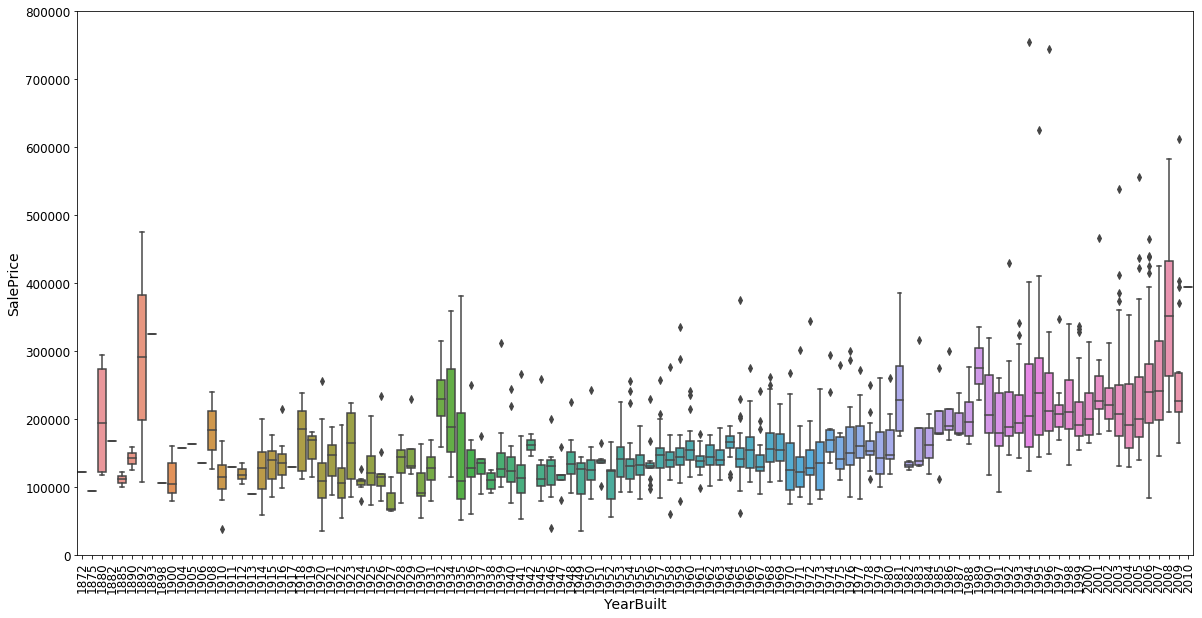

In [18]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=df_train["YearBuilt"], y=df_train["SalePrice"])
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<h5 > Looking for Correlations </h5>

In [19]:
corr_matrix = df_train.corr()

In [20]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
Id              -0.021673
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePr

The correlation coefficient ranges from –1 to 1. When it is close to 1, it
means that there is a strong positive correlation. When the
coefficient is close to –1, it means that there is a strong negative
correlation. Finally, coefficients close to 0 mean that there is no
linear correlation.

Another way to check for correlation between attributes is to use the
pandas scatter_matrix() function, which plots every numerical
attribute against every other numerical attribute. Since there are now 81
numerical attributes, you would get 81*81 plots, which would not fit on
a page—so let’s just focus on a few promising attributes that seem most
correlated with the SalePrice,

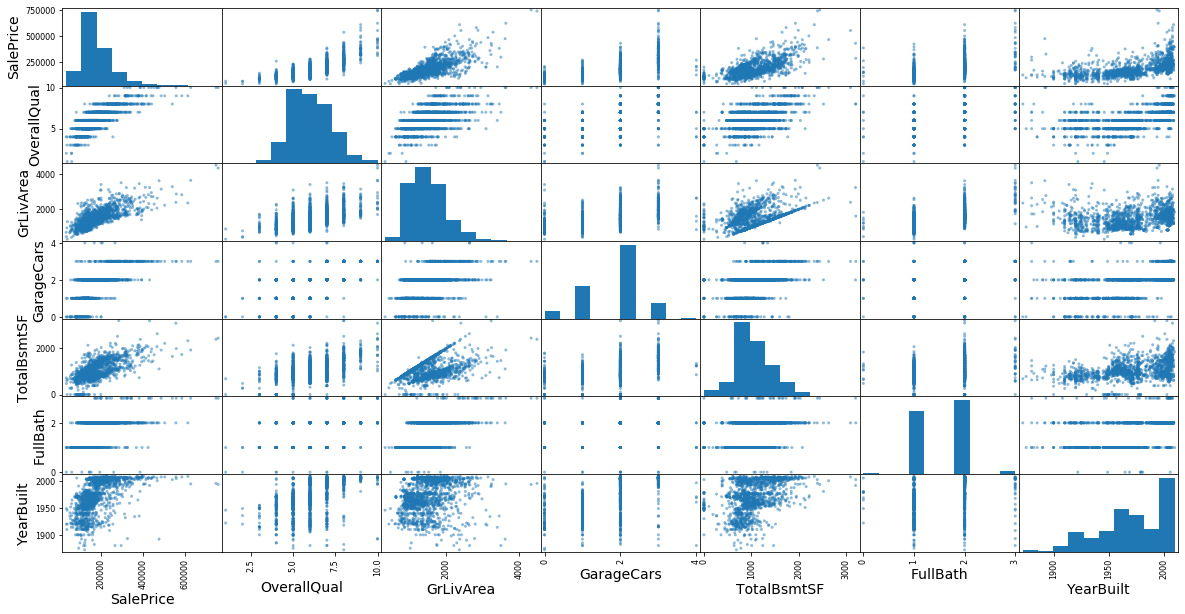

In [21]:
attributes = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
scatter_matrix(df_train[attributes], figsize=(20,10))

plt.show()

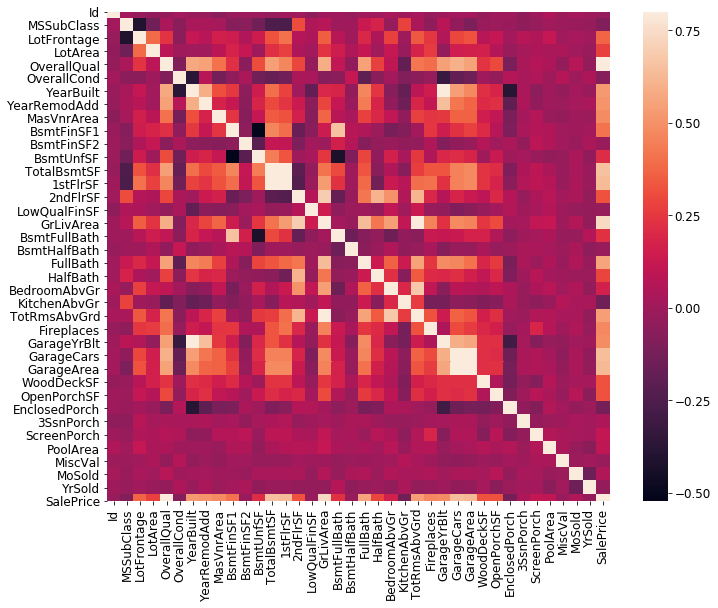

In [22]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<h5> Log Transformation of the target varibale </h5>

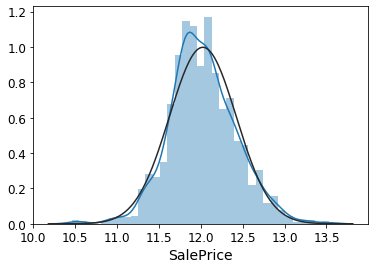

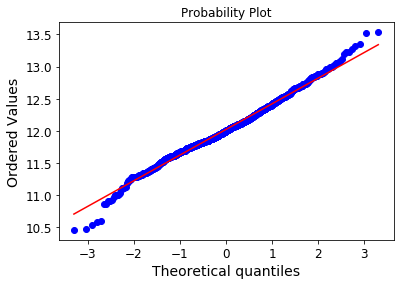

In [23]:
# numpy fucntion log1p transforms it
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

#See the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

<h3> Prepare the Data for Machine Learning Algorithms </h3>

In [24]:
# Split features and labels
y = df_train['SalePrice'].reset_index(drop=True)
train_features = df_train.drop(['SalePrice'], axis=1)
test_features = df_test

# Combine train and test features
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2917, 80)

<h5> Data Cleaning </h5>

In [25]:
#first check the missing data
total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageCond,159,5.450806
GarageQual,159,5.450806
GarageYrBlt,159,5.450806
GarageFinish,159,5.450806


Text(0, 0.5, 'Percent of missing values')

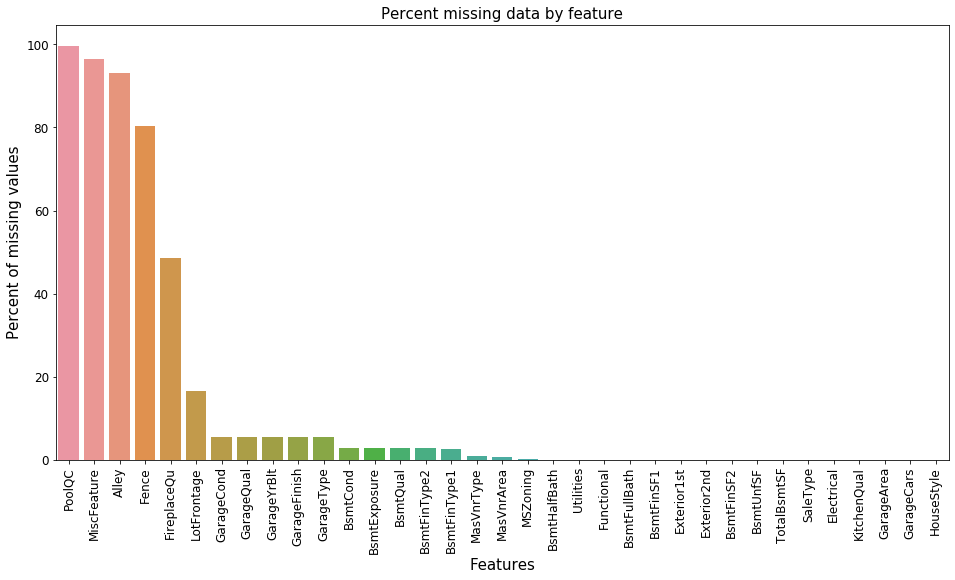

In [583]:
# Visualize missing values
missing_data=missing_data.head(35)
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.title('Percent missing data by feature', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

<h5> Imputing missing values </h5>

In [28]:
# PoolQC : data description says NA means "no pool"
all_features["PoolQC"] = all_features["PoolQC"].fillna("None")
# MiscFeature : data description says NA means "no misc feature"
all_features["MiscFeature"] =all_features["MiscFeature"].fillna("None")
# Alley : data description says NA means "no alley access"
all_features["Alley"] = all_features["Alley"].fillna("None")
# Fence : data description says NA means "no fence"
all_features["Fence"] = all_features["Fence"].fillna("None")
# FireplaceQu : data description says NA means "no fireplace"
all_features["FireplaceQu"] =all_features["FireplaceQu"].fillna("None")
# LotFrontage : filling missing values by the median LotFrontage of the neighborhood
all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# GarageType etc : data description says NA for garage features is "no garage"
for col in ( 'GarageCond', 'GarageQual','GarageType', 'GarageFinish'):
    all_features[col] = all_features[col].fillna('None')
for col in ('GarageYrBlt', 'GarageCars','GarageArea'):
    all_features[col] = all_features[col].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
     all_features[col] =  all_features[col].fillna('None')       
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
     all_features[col] =  all_features[col].fillna(0)      
# MasVnrType : NA most likely means no veneer
all_features["MasVnrArea"] = all_features["MasVnrArea"].fillna(0)
all_features["MasVnrType"] = all_features["MasVnrType"].fillna("None")
# MSZoning : RL is the most common value
all_features['MSZoning'] = all_features['MSZoning'].fillna(all_features['MSZoning'].mode()[0])
#Functional : data description says Typ means typical
all_features["Functional"] = all_features["Functional"].fillna("Typ")
# Utilities : NA most likely means all public utilities
all_features["Utilities"] = all_features["Utilities"].fillna("AllPub")
# SBrkr is the most common value
all_features['Electrical'] = all_features['Electrical'].fillna("SBrkr")
#all_features['Electrical'] = all_features['Electrical'].fillna(all_features['Electrical'].mode()[0])
# KitchenQual : NA most likely means typical
all_features["KitchenQual"] = all_features["KitchenQual"].fillna("TA")
#Functional : data description says NA most likely means No building class          
all_features['MSSubClass'] = all_features['MSSubClass'].fillna("None")
# Replace few other missing values with their mode
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0])
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])

<h5> Some numerical features are actually really categories</h5>

In [29]:
#convert them into strings
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

<h5> Fix skewed features </h5>

In [30]:
# Filter the skewed features
numeric_features = all_features.select_dtypes(include='number').columns
skew_features = all_features[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

skewness = skew_features[skew_features > 0.5]
skew_index = skewness.index

skewness = pd.DataFrame({'Skew' :skewness})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [38]:
#fix skewed features
for i in skew_index:
    all_features[i] = boxcox1p(all_features[i], boxcox_normmax(all_features[i] + 1))

<h5> Create new features </h5>

In [39]:
all_features["AllSF"] = all_features["GrLivArea"] + all_features["TotalBsmtSF"]
all_features["AllFlrsSF"] = all_features["1stFlrSF"] + all_features["2ndFlrSF"]
all_features['TotalSF'] = all_features['TotalBsmtSF'] + all_features['1stFlrSF'] + all_features['2ndFlrSF']
all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
                               all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))
all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] + all_features['3SsnPorch'] +
                              all_features['EnclosedPorch'] + all_features['ScreenPorch'] +
                              all_features['WoodDeckSF'])
all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']
all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] + all_features['BsmtFinSF2'] +
                                 all_features['1stFlrSF'] + all_features['2ndFlrSF'])
all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
all_features['TotalBsmtSF'] = all_features['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['2ndFlrSF'] = all_features['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
all_features['GarageArea'] = all_features['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['BsmtFinSF1'] = all_features['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['HasWoodDeck'] = (all_features['WoodDeckSF'] == 0) * 1
all_features['HasOpenPorch'] = (all_features['OpenPorchSF'] == 0) * 1
all_features['HasEnclosedPorch'] = (all_features['EnclosedPorch'] == 0) * 1
all_features['Has3SsnPorch'] = (all_features['3SsnPorch'] == 0) * 1
all_features['HasScreenPorch'] = (all_features['ScreenPorch'] == 0) * 1

Let's create a few more features by calcualting the log and the square of the features

In [40]:
def logs(columns):
    for col in columns:
        all_features[col+"_log"] = np.log(1.01+all_features[col])  

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','YearRemodAdd','TotalSF']

logs(log_features)

In [43]:
def squares(columns):
    for col in columns:
        all_features[col+"_sq"] =  all_features[col] * all_features[col]

squared_features = ['GarageArea_log','GarageCars_log','GrLivArea_log','YearRemodAdd', 'LotFrontage_log', 'TotalBsmtSF_log', '2ndFlrSF_log', 'GrLivArea_log' ]

squares(squared_features)

In [45]:
# Encode some categorical features as ordered numbers when there is information in the order
all_features = all_features.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [47]:
#numerically encode categorical features
all_features = pd.get_dummies(all_features).reset_index(drop=True)

In [49]:
# let's see the shape one more time
all_features.shape

(2917, 358)

In [50]:
all_features.head()

,Id,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,18.287076,15.324640,2,4,4,3,7,4.009159,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,20.844485,15.654151,2,4,4,3,6,6.033389,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,18.816322,16.069424,2,3,4,3,7,4.009159,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,17.382411,15.640586,2,3,4,3,7,4.009159,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,21.492507,16.702128,2,3,4,3,8,4.009159,2000,...,0,0,0,1,0,0,0,0,1,0


In [51]:
# check is there any NAs in the dataset 
print("NAs for categorical features in the dataset : " + str(all_features.isnull().values.sum()))

NAs for categorical features in the dataset : 0


<h5> Create train and test sets </h5>

In [52]:
X = all_features.iloc[:len(y), :]
X_test = all_features.iloc[len(y):, :]

In [53]:
X.shape, y.shape, X_test.shape

((1458, 358), (1458,), (1459, 358))

### Modelling

<h5> Setup cross validation </h5>

In [54]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

<h5>Define error metrics </h5>

In [55]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def rmse_cv(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

<h5> Base Models </h5>

<h5>  Linear Regression with Ridge regularization (L2 penalty) </h5>

In [56]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10,15, 20,25, 30, 60,90])
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4, alpha * 1.5, alpha * 1.6, alpha * 1.8], 
                cv = kf)
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4, alpha * 1.5, alpha * 1.6, alpha * 1.8]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas, cv=kf))

Best alpha : 15.0
Try again for more precision with alphas centered around 15.0
Best alpha : 15.75


#####  Linear Regression with Lasso regularization (L1 penalty)

In [57]:
lasso = LassoCV(alphas = [0.0001, 0.0003,0.0005, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = kf)
lasso.fit(X, y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = kf)

Best alpha : 0.0005
Try again for more precision with alphas centered around 0.0005


#####  Linear Regression with ElasticNet regularization (L1 and L2 penalty)

In [58]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7,0.75, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0005, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = kf)
elasticNet.fit(X, y)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 0.8, 1, 3, 6], 
                          max_iter = 50000, cv = kf)
elasticNet.fit(X, y)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = kf)


Best l1_ratio : 0.95
Best alpha : 0.0005
Try again for more precision with l1_ratio centered around 0.95
Best l1_ratio : 0.8075
Best alpha : 0.0006
Now try again for more precision on alpha, with l1_ratio fixed at 0.8075 and alpha centered around 0.0006


<h5>Support Vector Regressor </h5>

In [60]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

<h5> Kernel Ridge Regression </h5>

In [74]:
KRR = make_pipeline(RobustScaler(), KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))


<h5> Random Forest Regressor </h5>

In [61]:
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

<h5> Gradient Boosting Regressor </h5>

In [62]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

<h5> XGBoost Regressor </h5>

In [63]:
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=4060,gamma=0.0482,
                                     max_depth=4, min_child_weight=0,
                                     subsample=0.7,colsample_bytree=0.4603, 
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,reg_lambda=0.8571,
                                     reg_alpha=0.00006,random_state=42)

<h5> Light Gradient Boosting Regressor </h5>

In [64]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=6500,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=5, 
                       bagging_seed=9,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_data_in_leaf =6,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

<h5> Stacking CV Regressor </h5>

In [65]:
stackReg = StackingCVRegressor(regressors=(lightgbm,gbr, rf, ridge,lasso,elasticNet),
                                meta_regressor=(xgboost),
                                use_features_in_secondary=True, 
                                random_state=42)

<h5> Base Models Scores </h5>

In [69]:
scores = {}

score = rmse_cv(ridge)
ridge_model= ridge.fit(X, y)
print("ridge : {:0.4f}".format(score.mean()))
scores['ridge'] = score.mean()

ridge : 0.1106


In [70]:
score = rmse_cv(lasso)
lasso_model= lasso.fit(X, y)
print("lasso : {:0.4f}".format(score.mean()))
scores['lasso'] = score.mean()

lasso : 0.1075


In [71]:
score = rmse_cv(elasticNet)
elasticNet_model= elasticNet.fit(X, y)
print("elasticNet : {:0.4f}".format(score.mean()))
scores['elasticNet'] = score.mean()

elasticNet : 0.1076


In [72]:
score = rmse_cv(svr)
svr_model= svr.fit(X, y)
print("svr: {:0.4f}".format(score.mean()))
scores['svr'] = score.mean()

svr: 0.1106


In [75]:
score = rmse_cv(KRR)
KRR_model= KRR.fit(X, y)
print("KRR: {:0.4f}".format(score.mean()))
scores['KRR'] = score.mean()

KRR: 0.1135


In [76]:
score = rmse_cv(rf)
rf_model= rf.fit(X, y)
print("rf: {:0.4f}".format(score.mean()))
scores['rf'] = score.mean()

rf: 0.1395


In [77]:
score = rmse_cv(gbr)
gbr_model= svr.fit(X, y)
print("gbr: {:0.4f}".format(score.mean()))
scores['gbr'] = score.mean()

gbr: 0.1131


In [78]:
score = rmse_cv(xgboost)
xgboost_model= xgboost.fit(X, y)
print("xgboost: {:0.4f}".format(score.mean()))
scores['xgboost'] = score.mean()

[23:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

In [79]:
score = rmse_cv(lightgbm)
lgb_model= lightgbm.fit(X, y)
print("lightgbm: {:0.4f}".format(score.mean()))
scores['lgb'] = score.mean()

lightgbm: 0.1156


In [80]:
score = rmse_cv(stackReg)
stackReg_model= stackReg.fit(X, y)
print("stackReg: {:0.4f}".format(score.mean()))
scores['stackReg'] = score.mean()

[23:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

<h5> Deep Neural Network with Dropout </h5>

In [84]:
model =Sequential()

model.add(Dense(358,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(180,activation='relu'))

model.add(Dense(90,activation='relu'))

model.add(Dense(45,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))

model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [85]:
scale = StandardScaler()
X_train = scale.fit_transform(X)
X_val=scale.transform(X_test)

In [87]:
model.fit(X_train, y.values, epochs=500,batch_size=32)

Train on 1458 samples
Epoch 1/500
1458/1458 [==============================] - 0s 257us/sample - loss: 34.5440
Epoch 2/500
1458/1458 [==============================] - 0s 80us/sample - loss: 2.0394
Epoch 3/500
1458/1458 [==============================] - 0s 77us/sample - loss: 1.1647
Epoch 4/500
1458/1458 [==============================] - 0s 78us/sample - loss: 0.9619
Epoch 5/500
1458/1458 [==============================] - 0s 77us/sample - loss: 0.8498
Epoch 6/500
1458/1458 [==============================] - 0s 78us/sample - loss: 0.8856
Epoch 7/500
1458/1458 [==============================] - 0s 76us/sample - loss: 0.7324
Epoch 8/500
1458/1458 [==============================] - 0s 77us/sample - loss: 0.8286
Epoch 9/500
1458/1458 [==============================] - 0s 77us/sample - loss: 0.7671
Epoch 10/500
1458/1458 [==============================] - 0s 80us/sample - loss: 0.7696
Epoch 11/500
1458/1458 [==============================] - 0s 77us/sample - loss: 0.8184
Epoch 12/500
1458

See the loss 

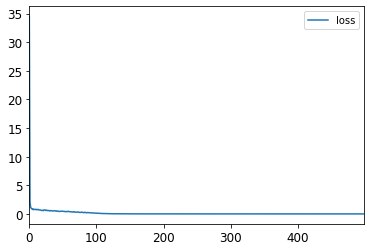

In [88]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [107]:
#Check the rmse of the deep neural network model
rmse=mean_squared_error(model.predict(X_train), y)**0.5
rmse
scores['deepNeural'] = rmse

In [108]:
scores

{'ridge': 0.11059428854597046,
 'lasso': 0.1074958298018842,
 'elasticNet': 0.10755928655306808,
 'svr': 0.1106461985153981,
 'KRR': 0.11346376178290048,
 'rf': 0.13948573702659275,
 'gbr': 0.1131400119711143,
 'xgboost': 0.11398647140160804,
 'lgb': 0.11559132856556259,
 'stackReg': 0.11083249100981789,
 'deepNeural': 0.02450140475948406}

In [109]:
#preeict Test Sales Price
yhat=np.expm1(model.predict(X_val))
yhat

array([[136396.53],
       [171503.6 ],
       [194650.6 ],
       ...,
       [170708.73],
       [136207.4 ],
       [211615.17]], dtype=float32)

<h3> Blend all the models and let's get the predictions </h3>

In [177]:
#Also ignoring the deep neural network model as this can overfit the test data
def blendedModelPredictions(X,X_train):
    return ((0.15 * ridge_model.predict(X)) + \
            (0.2 * svr_model.predict(X)) + \
            (0.1 * gbr_model.predict(X)) + \
            (0.15 * xgboost_model.predict(X)) + \
            (0.1 * lgb_model.predict(X)) + \
            (0.3 * stackReg_model.predict(np.array(X))))

In [178]:
yhat11=blendedModelPredictions(X_test,X_val)
np.expm1(yhat11)

array([119499.90543756, 165504.02895832, 182694.51391532, ...,
       165460.19152831, 110525.89523931, 216349.94593318])

In [179]:
# blendedModelPrediction
blended_score = rmsle(y, blendedModelPredictions(X,X_train))
print("blended score: {:.4f}".format(blended_score))
scores['blended'] =  blended_score

blended score: 0.0644


In [131]:
pd.Series(scores).sort_values(ascending=True)

deepNeural    0.024501
blended       0.063569
lasso         0.107496
elasticNet    0.107559
ridge         0.110594
svr           0.110646
stackReg      0.110832
gbr           0.113140
KRR           0.113464
xgboost       0.113986
lgb           0.115591
rf            0.139486
dtype: float64

<h3> Predictions and Submission </h3>

In [180]:
submission = pd.read_csv (r'C:\Users\Mizanur Rahman\Desktop\Kaggle Competitions\House Prices Advanced Regression Techniques\house-prices-advanced-regression-techniques\sample_submission.csv')


In [181]:
submission.iloc[:,1] = np.floor(np.expm1(blendedModelPredictions(X_test,X_val)))

In [147]:
submission.head()

,Id,SalePrice
0,1461,120845.332350
1,1462,163286.934237
2,1463,181206.899766
3,1464,194348.141046
4,1465,191185.028244


In [184]:
submission.to_csv("submission_V1.csv", index=False)

<h5> Thank you very much </h5>

I found the following Kernel very useful
1. https://www.kaggle.com/itslek/blend-stack-lr-gb-0-10649-house-prices-v57/data?scriptVersionId=11189608
2. https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

This is my first Kernel in Kaggle. Please let me know if you think this Kerner can be further improved or find an error. 
A few upvotes would by highly appreciated,  if you can find this Kernel useful. 
    
